## **Electricity Price Prediction with Machine Learning**

> ### Introduction 

Predicting the price of electricity consumed depends on some factors, for example you might own a business that uses a lot of gadgets to keep the business going. Now the number of times the devices are used will vary as they will depend on business need. That said, how much you use spend on electricity will be affected by a many of factors but it is important to determine a way to be able to predict the price of electricity in order to include this in cost planning. This project can also help homes and private electricity consumers in determining how much they spend on electricity and also determine ways to reduce electricity bills. 

### Importing necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### The Dataset 

In [5]:
df = pd.read_csv('electricity.csv', na_values=['?'])

In [6]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


#### understanding the data context
The features contained in this data represents the following:
1. DateTime: Date and time of the record
2. Holiday: contains the name of the holiday if the day is a national holiday
3. HolidayFlag: contains 1 if it’s a bank holiday otherwise 0
4. DayOfWeek: contains values between 0-6 where 0 is Monday
5. WeekOfYear: week of the year
6. Day: Day of the date
7. Month: Month of the date
8. Year: Year of the date
9. PeriodOfDay: half-hour period of the day
10. ForcastWindProduction: forecasted wind production
11. SystemLoadEA forecasted national load
12. SMPEA: forecasted price
13. ORKTemperature: actual temperature measured
14. ORKWindspeed: actual windspeed measured
15. CO2Intensity: actual C02 intensity for the electricity produced
16. ActualWindProduction: actual wind energy production
17. SystemLoadEP2: actual national system load
18. SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)


In [7]:
df.shape

(38014, 18)

The dataset contains 38014 rows and 18 columns. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

Looking at the summary of the data, The values have a valid datatype.


#### To check for null values

In [9]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

columns with null values are not good for this analysis, and since there's no way to fill them while maintaining data integrity, I have to drop them.

In [10]:
df = df.dropna()

### Visualizations
Some visualizations to help with drawing insights from the data

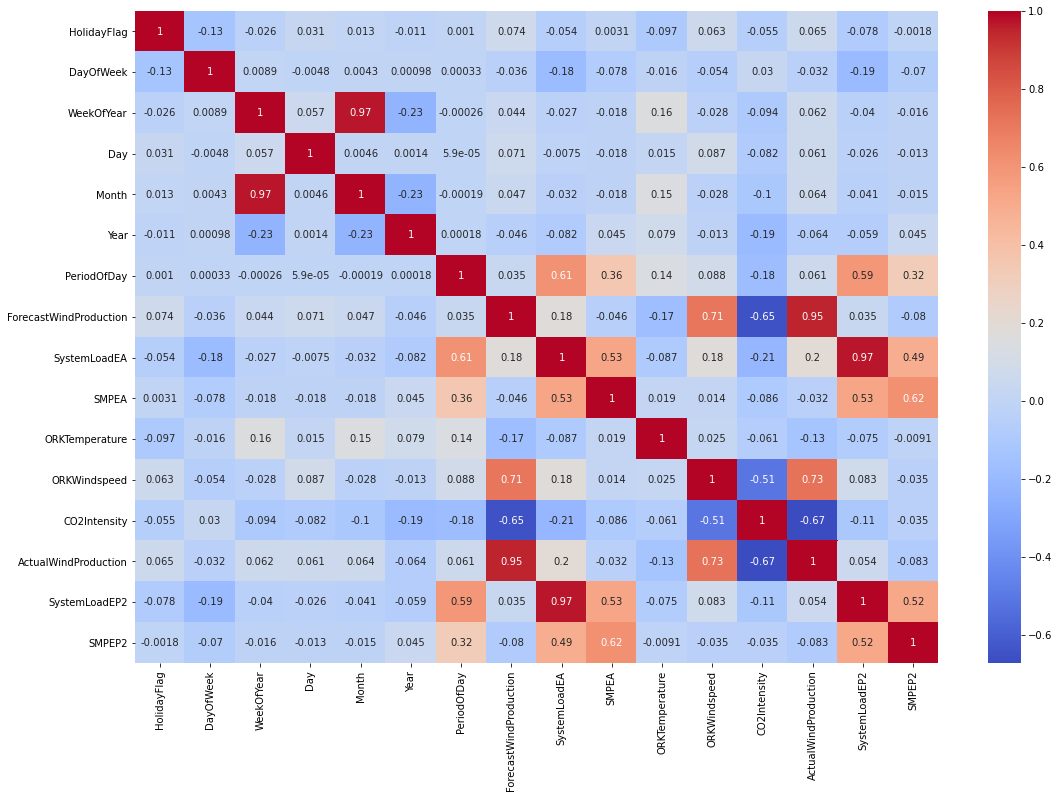

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(method='pearson'), cmap="coolwarm", annot=True)
plt.show()

Distribution plot of the Target Feature

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SMPEP2', ylabel='Density'>

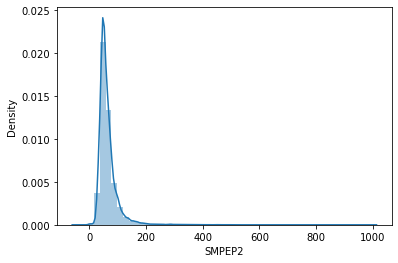

In [14]:
sns.distplot(df['SMPEP2'])

### Buiding the Model

In [16]:
#using only the important features 
x = df[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
#Target feature
y = df["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

#### Using Random Forest regression 

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fitting the model
model.fit(xtrain, ytrain)

RandomForestRegressor()

#### Prediction 

In [21]:
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[11, 12, 52.10, 4446.05, 49.56, 9.0, 17.8, 472.32, 54.0, 4426.84]])
model.predict(features)

array([66.2752])

#### Ealuating the Model on test set

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score
predictions = model.predict(xtest)
print(f"MAE: {mean_absolute_error(ytest, predictions)}")

print(f"R2_score: {r2_score(ytest, predictions)}")

MAE: 9.401643359426828
R2_score: 0.5419293451879772


### Conclusion

We can predict the price of electricity based on some features, this can help businesses and homes to estimate how much they need to spend and also plan accordingly. 